<a href="https://colab.research.google.com/github/binit24/NLP-Natural-Language-Processing/blob/main/Yahoo_Dateset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [198]:
#Lets import Libraries:
import numpy as np
import pandas as pd
import datetime
import warnings
warnings.filterwarnings('ignore')

#Data Visualization Libraries:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [159]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [160]:
f = open("ORCL (1).csv")

In [161]:
#Reading the Dataset:
df = pd.read_csv('ORCL (1).csv',index_col="Date",parse_dates=True)
print(df.shape) #checking no of rows and columns in the dataset.
df.head()
#High implies Highest Price
#Low implies Lowest Price.
#Volume implies no of shares or contracts traded.

(754, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,38.450001,38.689999,38.299999,38.549999,35.928013,11051300
2017-01-04,38.549999,38.919998,38.549999,38.740002,36.105095,9545500
2017-01-05,38.669998,38.950001,38.410000,38.639999,36.011898,12064700
2017-01-06,38.750000,38.750000,38.380001,38.450001,35.834816,14829700
2017-01-09,38.529999,39.450001,38.470001,39.029999,36.375370,15587900


In [28]:
#Displaying all the columns and rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [117]:
#Checking no of rows and columns:
print("No. of rows = ", df.shape[0])
print("No. of columns = ", df.shape[1])

No. of rows =  754
No. of columns =  6


In [30]:
#Checking the datatypes of each feature:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [15]:
#Checking null values:
df.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [9]:
#Checking the missing values in data set
df.isnull().values.any()

False

In [10]:
#Row indexes of empty rows
print("Row indexes of empty rows : ", df[df.isnull().all(axis =1)].index.tolist())

Row indexes of empty rows :  []


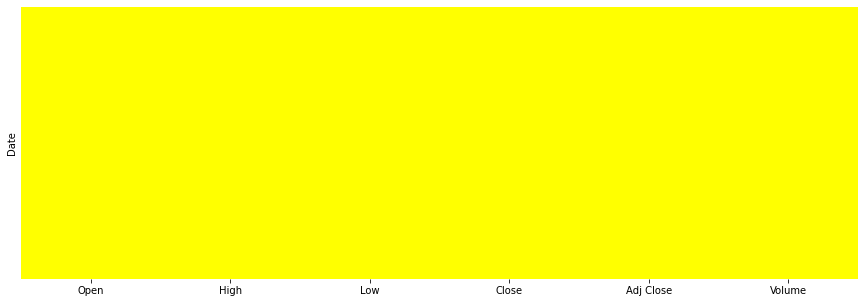

In [13]:
#Seeing the missing values via visualization
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='gnuplot_r')
plt.show()

In [14]:
#Checking the info of the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2017-01-03 to 2019-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       754 non-null    float64
 1   High       754 non-null    float64
 2   Low        754 non-null    float64
 3   Close      754 non-null    float64
 4   Adj Close  754 non-null    float64
 5   Volume     754 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 41.2 KB


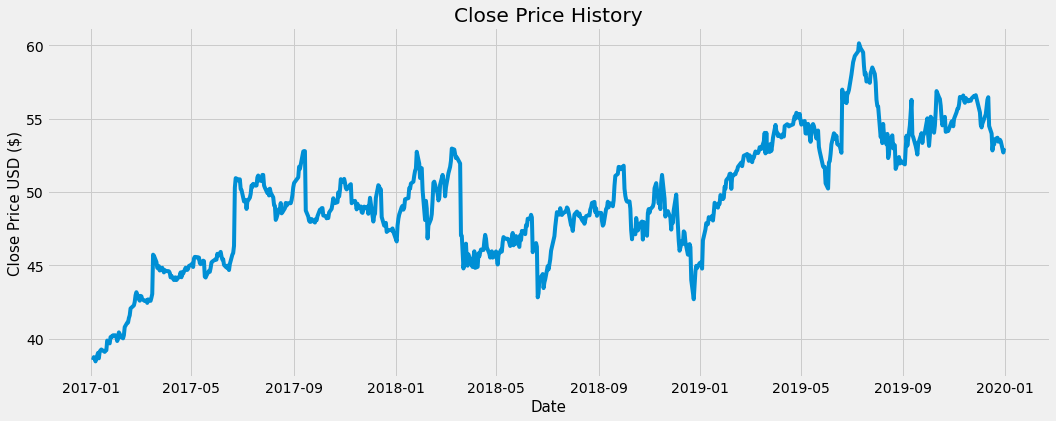

In [199]:
#Visualizing the closing price history:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=15)
plt.ylabel('Close Price USD ($)',fontsize=15)
plt.show()

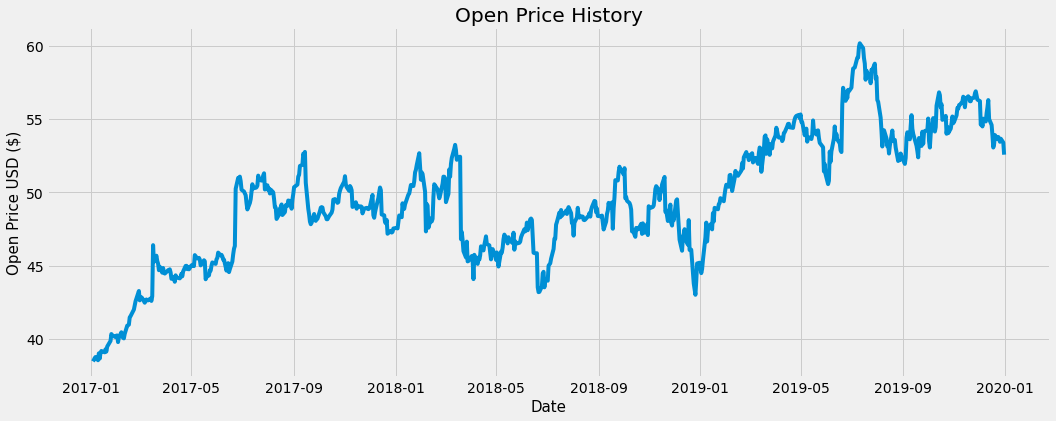

In [200]:
#Checking the growth of prices and stocks from 2017 to 2020 open price history.
plt.figure(figsize=(16,6))
plt.title('Open Price History')
plt.plot(df['Open'])
plt.xlabel('Date',fontsize=15)
plt.ylabel('Open Price USD ($)',fontsize=15)
plt.show()

In [31]:
#Lets find 7 days rolling mean of the stock price:
df.rolling(7).mean().head(15)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-11,38.655714,38.994286,38.487143,38.740000,36.105094,1.211411e+07
2017-01-12,38.738571,39.084286,38.528571,38.832858,36.191637,1.218206e+07
2017-01-13,38.825714,39.142858,38.597143,38.907143,36.260869,1.216917e+07


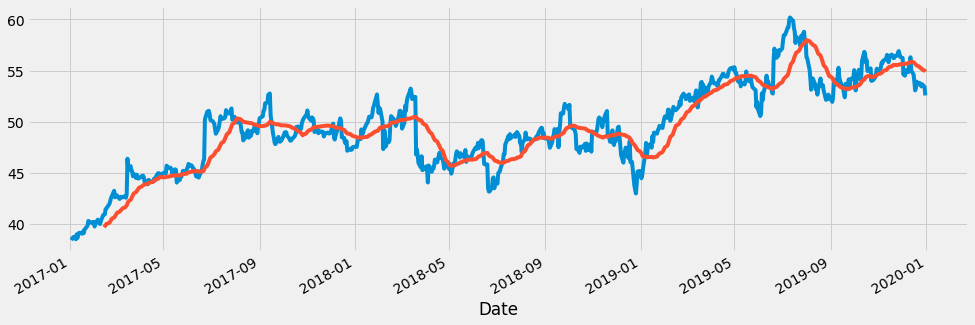

In [201]:
#Visualizing the average rolling period of 7 days for open and closing of stock:
#Graph represent the moving average for first 30 days:
df['Open'].plot(figsize=(15,5))
df.rolling(window=30).mean()['Close'].plot()

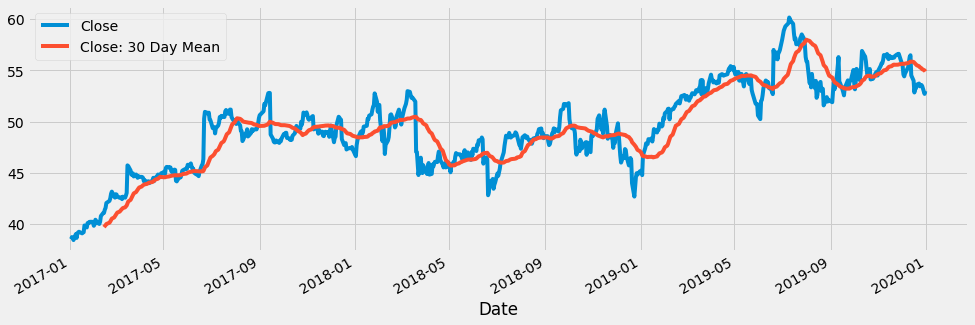

In [202]:
#Viusalizing the closing stocks and 7 days moving average:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()
df[['Close','Close: 30 Day Mean']].plot(figsize=(15,5))

In [162]:
#Data Preprocessing:
#Creating our training dataset:
#Creating a new dataframe with only the Open column:
import math
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the Model:
training_data_len = math.ceil(len(dataset) * .7)
training_data_len

528

In [163]:
#Lets check the null values and clean our dataset:
df.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [164]:
#Using Min Max Scaler: Transform features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set e.g. between zero and one.
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
scaled_data = sc.fit_transform(dataset)

In [165]:
#Creating the training dataset:(containing past 60 days values):
#Creating a data structure with 60 timesteps and 1 output:
train_data = scaled_data[0:training_data_len, :]
#Splitting the dataset into training and testing sets:
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 60:
    print(x_train)
    print(y_train)

[array([0.0046082 , 0.0133641 , 0.00875567, 0.        , 0.02672802,
       0.00967737, 0.03041475, 0.03456221, 0.03732705, 0.02995378,
       0.03410129, 0.03502295, 0.06543769, 0.05668198, 0.07603672,
       0.07834106, 0.07741935, 0.0820276 , 0.0820276 , 0.07649769,
       0.06405525, 0.07050686, 0.09124419, 0.07603672, 0.07465433,
       0.07235018, 0.0820276 , 0.1078341 , 0.12165893, 0.12211967,
       0.13640548, 0.14470041, 0.16635944, 0.17603681, 0.18709663,
       0.207834  , 0.21751137, 0.19585253, 0.19078336, 0.20599064,
       0.20460819, 0.1953916 , 0.1898617 , 0.19124409, 0.19170506,
       0.18387087, 0.19493082, 0.19032262, 0.19999999, 0.21198146,
       0.33548381, 0.332258  , 0.31244234, 0.29446999, 0.29216589,
       0.29953916, 0.28571432, 0.29446999, 0.2875575 , 0.27972344])]
[0.28709671488033583]


In [166]:
#Now converting X_train and y_train into numpy arrays:
x_train, y_train = np.array(x_train), np.array(y_train)

In [167]:
#Reshaping the dataset:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(468, 60, 1)

In [168]:
#Importing Libraries for Predictions:
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Dropout
model = Sequential()
model.add(LSTM(50, return_sequences =True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [169]:
#Compile the Model:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [190]:
#Fitting the Model:
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
468/468 [==============================] - 10s 21ms/step - loss: 0.0030
Epoch 2/10
468/468 [==============================] - 10s 21ms/step - loss: 0.0022
Epoch 3/10
468/468 [==============================] - 10s 21ms/step - loss: 0.0018
Epoch 4/10
468/468 [==============================] - 10s 21ms/step - loss: 0.0017
Epoch 5/10
468/468 [==============================] - 10s 21ms/step - loss: 0.0015
Epoch 6/10
468/468 [==============================] - 10s 21ms/step - loss: 0.0013
Epoch 7/10
468/468 [==============================] - 10s 21ms/step - loss: 0.0013
Epoch 8/10
468/468 [==============================] - 10s 21ms/step - loss: 0.0015
Epoch 9/10
468/468 [==============================] - 10s 21ms/step - loss: 0.0015
Epoch 10/10
468/468 [==============================] - 10s 21ms/step - loss: 0.0014


In [191]:
#Creating the testing dataset:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [192]:
#Converting the data into numpy array:
x_test = np.array(x_test)
#Reshape the data:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1 ))

In [193]:
#Getting the Models Predicted price values:
predictions = model.predict(x_test)
predictions = sc.inverse_transform(predictions)

In [194]:
#Computing the Root mean squared error RMSE:
rmse = np.sqrt( np.mean( predictions - y_test)**2 )
rmse

0.6755961033308994

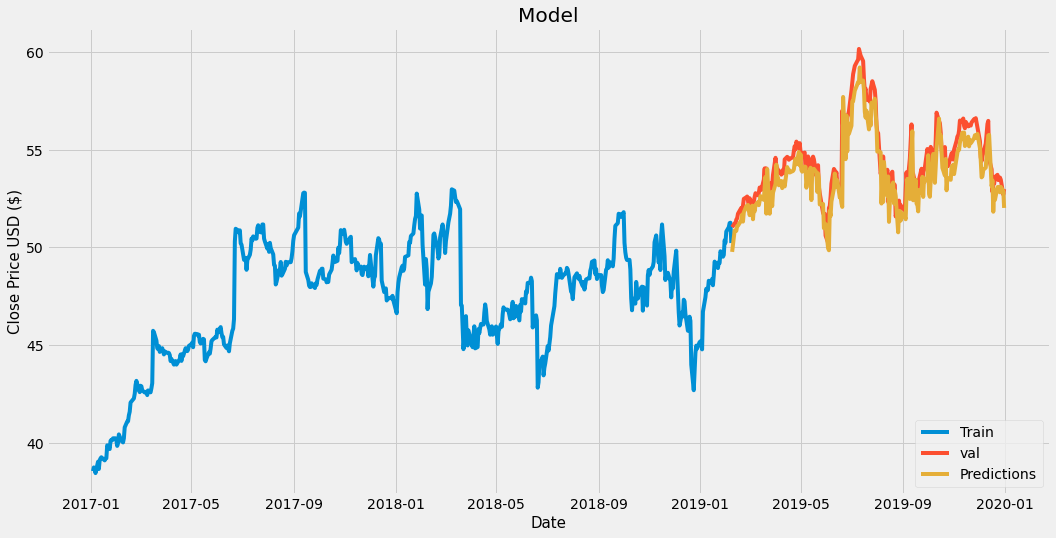

In [203]:
#plot the data:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=15)
plt.ylabel('Close Price USD ($)',fontsize=15)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','val','Predictions'], loc='lower right')
plt.show()

In [182]:
#Show valid and predicted prices:
valid[:10]

,Close,Predictions
Date,,
2019-02-08,51.029999,49.769142
2019-02-11,51.230000,49.789112
2019-02-12,51.220001,49.834843
2019-02-13,51.419998,49.882477
2019-02-14,51.480000,49.947899
2019-02-15,51.720001,50.017624
2019-02-19,52.020000,50.107838
2019-02-20,51.770000,50.229561
2019-02-21,52.110001,50.314117


In [196]:
#Predicing the closing stock of oracle for 18th December 2019:
#Get the Quote:
import pandas_datareader.data as web
oracle_quote = web.DataReader('ORCL',data_source = 'yahoo',start='2017-01-03', end='2019-12-18')
#creating a new Dataframe:
new_df = oracle_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the Dataframe to an array:
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list:
X_test = []
#Append the past 60 days:
X_test.append(last_60_days_scaled)
#Convert the X_test to numpy array:
X_test = np.array(X_test)
#Reshape the data:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predictions:
pred_price = model.predict(X_test)
#Undo the scaling:
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[52.924892]]


In [197]:
#Get the Quote checking the actual closing stock price for 18/12/2019:
oracle_quote2 = web.DataReader('ORCL',data_source = 'yahoo',start='2019-12-18', end='2019-12-18')
print(oracle_quote2['Close'])

Date
2019-12-18    53.389999
Name: Close, dtype: float64
